In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from gtts import gTTS
import os
import speech_recognition as sr
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
# Suppress warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv("Language Detection.csv")
print(data.head(10))

                                                Text Language
0   Nature, in the broadest sense, is the natural...  English
1  "Nature" can refer to the phenomena of the phy...  English
2  The study of nature is a large, if not the onl...  English
3  Although humans are part of nature, human acti...  English
4  [1] The word nature is borrowed from the Old F...  English
5  [2] In ancient philosophy, natura is mostly us...  English
6  [3][4] \nThe concept of nature as a whole, the...  English
7  During the advent of modern scientific method ...  English
8  [5][6] With the Industrial revolution, nature ...  English
9  However, a vitalist vision of nature, closer t...  English


In [3]:
data["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [4]:
X = data["Text"]
y = data["Language"]

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [6]:
data_list = []
# iterating through all the text
for text in X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # converting the text to lower case
        text = text.lower()
        # appending to data_list
        data_list.append(text)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [9]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9796905222437138


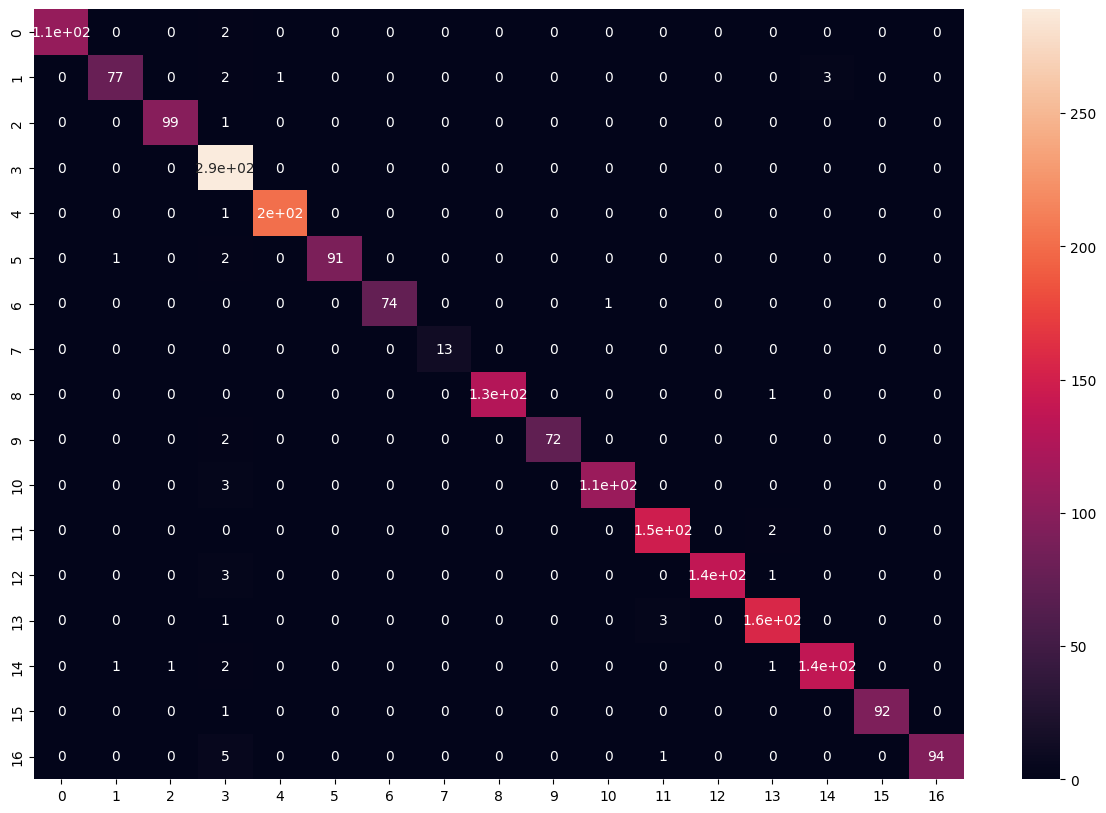

In [12]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [25]:
# Function for speech input
def detect_language_from_speech():
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("Please speak the text:")
        audio = recognizer.listen(source)
    try:
        # Recognize speech to obtain language code
        lang_code = recognizer.recognize_google(audio, show_all=False)
        print("Language code:", lang_code)
        
        # Recognize speech to get recognized text
        audio_text = recognizer.recognize_google(audio, language="en")
        print("You said:", audio_text)
        
        # Recognize speech in the original language for language detection
        detected_audio = recognizer.recognize_google(audio, language=lang_code)
        
        # Perform language detection on the recognized text
        x = cv.transform([detected_audio]).toarray()
        lang = model.predict(x)
        lang = le.inverse_transform(lang)
        messagebox.showinfo("Prediction", f"The language is in {lang[0]}")
    except Exception as e:
        print("Exception:", str(e))
        messagebox.showerror("Error", "Could not recognize speech")

In [26]:
def detect_language_from_typing():
    text = entry.get()
    detect_language(text)

In [27]:
def detect_language(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    messagebox.showinfo("Prediction", f"The language is in {lang[0]}")

In [ ]:
root = tk.Tk()
root.title("Language Detection")

frame = ttk.Frame(root, padding="20")
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

label = ttk.Label(frame, text="Choose input method:")
label.grid(row=0, column=0, columnspan=2)

# Button for typing input
button_typing = ttk.Button(frame, text="Type", command=detect_language_from_typing)
button_typing.grid(row=1, column=0, padx=5, pady=5)

# Button for speech input
button_speech = ttk.Button(frame, text="Speak", command=detect_language_from_speech)
button_speech.grid(row=1, column=1, padx=5, pady=5)

entry = ttk.Entry(frame, width=50)
entry.grid(row=2, column=0, columnspan=2, padx=5, pady=5)

root.mainloop()

Please speak the text:
Exception: 
Please speak the text:
Language code: hello
You said: hello
Please speak the text:
Language code: namaste
You said: namaste
Please speak the text:
Exception: 


In [17]:
!pip install gtts


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
!pip install SpeechRecognition


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
